In [1]:
# import necessary packages
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

# if this works then ye load karke sidha step 2 ke aage ka code run karo

In [2]:

# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# For downloaded data

In [3]:
data = pd.read_csv("fashion-mnist_train.csv")
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the dataset
X = data.drop(columns="label")
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEPS for any type of data 

In [5]:
# convert image into numpy array as type of float 32
X_train = np.array(X_train, dtype="float32")   
X_test = np.array(X_test, dtype="float32")

# preprocessing image by dividing into 255.0 value
X_train = X_train/255.0      
X_test = X_test/255.0

# reshape the train & test dataset
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [6]:
model = Sequential()
     
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

      # Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [8]:
# fitting the dataset with the tuned model and validating our model using test data
Model = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 13s 4ms/step - loss: 0.4062 - accuracy: 0.8557
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2720 - accuracy: 0.9020
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2222 - accuracy: 0.9188
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1860 - accuracy: 0.9318
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1564 - accuracy: 0.9432
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1316 - accuracy: 0.9509
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1078 - accuracy: 0.9615
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0901 - accuracy: 0.9679
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0736 - accuracy: 0.9743
Epoch 10/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.05

In [9]:
loss, acc = model.evaluate(X_test, y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.9086


[[5.9457416e-06 7.6951265e-13 4.1270262e-10 2.5576979e-15 3.2407180e-10
  2.8675963e-11 6.3010049e-08 2.6037157e-11 9.9999392e-01 1.7873911e-07]
 [3.5869889e-03 2.9123933e-08 5.9557241e-01 3.5923840e-06 1.2369172e-03
  7.9165443e-07 3.9959607e-01 3.1693878e-10 1.4049756e-06 1.7617151e-06]] 8
bag


<function matplotlib.pyplot.show(close=None, block=None)>

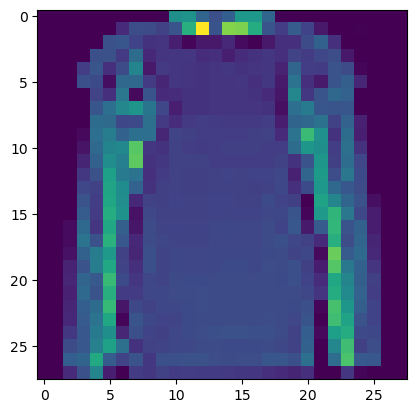

In [16]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
     

predictions = model.predict(X_test[:2])
     

print(predictions,np.argmax(predictions))
import numpy as np
     

label = labels[np.argmax(predictions)]
     

import matplotlib.pyplot as plt
print(label)
plt.imshow(X_test[:2][1])
plt.show
     